# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [44]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
data = pd.io.stata.read_stata('us_job_market_discrimination.dta')

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
# number of callbacks for black-sounding names
b_call = sum(data[data.race=='b'].call)
b_no_call = sum(data[data.race !='b'].call)

# number of callbacks for black-sounding names
w_call = sum(data[data.race=='w'].call)
w_no_call = sum(data[data.race !='w'].call)

print('Black sounding calls: ' + str(b_call) + ' and no calls: '+ str(b_no_call))
print('White sounding calls: ' + str(w_call) + ' and no calls: '+ str(w_no_call))

Black sounding calls: 157.0 and no calls: 235.0
White sounding calls: 235.0 and no calls: 157.0


In [6]:
b_call/b_no_call

0.66808510638297869

In [7]:
w_call/w_no_call

1.4968152866242037

Chi square test would be appropriate here. Proportions should not be dependen on race.

In [8]:
b_call_chi = data[data.race=='b'].call
b_call_chi.describe()
b_call_chi = np.array(b_call_chi)

In [9]:
w_call_chi = data[data.race=='w'].call
w_call_chi = np.array(w_call_chi)

In [35]:
b_call_chi = list(b_call_chi)
w_call_chi = list(w_call_chi)

In [36]:
call_list = zip(b_call_chi, w_call_chi )

In [37]:
call_list_df = pd.DataFrame(call_list, columns = ['b', 'w'])

In [52]:
call_list_df.head()

,b,w
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [105]:
call_list_df_2 = call_list_df.copy()

In [106]:
call_list_df_2 = call_list_df_2.stack() # stack

In [107]:
call_list_df_2 = pd.DataFrame(call_list_df_2)

In [108]:
call_list_df_2.reset_index(inplace = True)
#call_list_df_2.drop(['level_0', 'index'], axis =1)

In [110]:
call_list_df_2.columns = ['null', 'sound', 'call']
#df.columns.values[2] = 'c' 

In [113]:
call_list_df_3 = call_list_df_2.drop('null', axis = 1)

In [115]:
call_list_df_3.head()

,sound,call
0,b,0.0
1,w,0.0
2,b,0.0
3,w,0.0
4,b,0.0


In [123]:
call_list_df_3.groupby(['sound']).describe()

call
sound                   
b     count  2435.000000
      mean      0.064476
      std       0.245650
      min       0.000000
      25%       0.000000
      50%       0.000000
      75%       0.000000
      max       1.000000
w     count  2435.000000
      mean      0.096509
      std       0.295349
      min       0.000000
      25%       0.000000
      50%       0.000000
      75%       0.000000
      max       1.000000

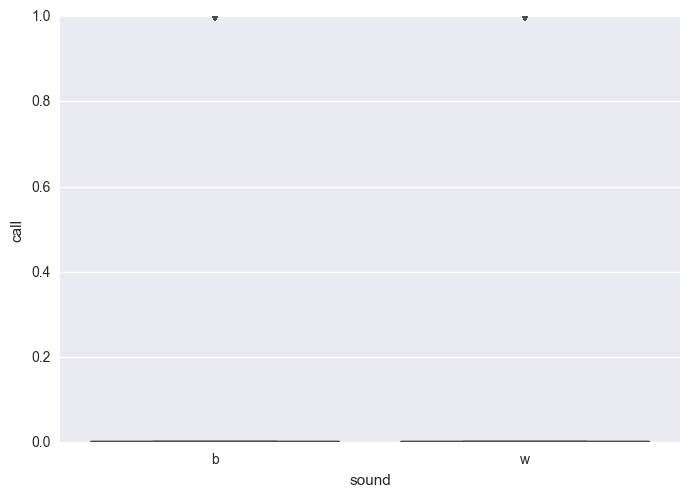

In [122]:
sns.boxplot(x = 'sound', y = 'call', data = call_list_df_3)
plt.show()

In [33]:
v2 = stats.chisquare(call_list_df.b, call_list_df.w)
v2

Power_divergenceResult(statistic=nan, pvalue=nan)

In [23]:
v = stats.chisquare(call_list_df.b, call_list_df.w)
v

Power_divergenceResult(statistic=nan, pvalue=nan)

In [34]:
stats.chisquare(f_obs= call_list_df.b,   # Array of observed counts
                f_exp= call_list_df.w)   # Array of expected counts

Power_divergenceResult(statistic=nan, pvalue=nan)